In [33]:
import os, sys, time, re, collections, operator, copy, itertools, zipfile
import pandas as pd
import numpy as np
from pyxdameraulevenshtein import normalized_damerau_levenshtein_distance
from jellyfish import jaro_winkler
import seaborn as sns
%matplotlib inline

FOLDER = "/media/shared_ardalan_evgeny/"

pd.set_option("display.max_columns", 99)

def loadFileinZipFile(zip_filename, dtypes=None, parsedate=None, password=None, **kvargs):
    """
    Load file to dataframe.
    """
    with zipfile.ZipFile(zip_filename, 'r') as myzip:
        if password:
            myzip.setpassword(password)

        inside_zip_filename = myzip.filelist[0].filename

        if parsedate:
            pd_data = pd.read_csv(myzip.open(inside_zip_filename), sep=',', parse_dates=parsedate, dtype=dtypes,
                                  **kvargs)
        else:
            pd_data = pd.read_csv(myzip.open(inside_zip_filename), sep=',', dtype=dtypes, **kvargs)
        return pd_data, inside_zip_filename

In [7]:
pdtrain, _ = loadFileinZipFile(FOLDER + "train_merged.csv.zip")

In [8]:
pdtrain.head()

,itemID_1,categoryID_1,title_1,description_1,images_array_1,attrsJSON_1,price_1,locationID_1,metroID_1,lat_1,lon_1,isDuplicate,generationMethod,parentCategoryID_1,regionID_1,itemID_2,categoryID_2,title_2,description_2,images_array_2,attrsJSON_2,price_2,locationID_2,metroID_2,lat_2,lon_2,parentCategoryID_2,regionID_2
0,1,81,Продам Камаз 6520,Продам Камаз 6520 20 тонн,"1064094, 5252822, 6645873, 6960145, 9230265","{""Вид техники"":""Грузовики""}",300000.0,648140,NaN,64.686946,30.815924,1,1,1,648070,4112648,81,Продам Камаз 6520,Продам Камаз 6520 20 тонн,"1227519, 1374615, 7072137, 8671835","{""Вид техники"":""Грузовики""}",300000.0,648140,NaN,64.686946,30.815924,1,648070
1,523245,39,Ботинки для сноуборда,Продам в хорошем состоянии 2 пары ботинок для ...,"220463, 5878249, 9881846","{""Вид товара"":""Зимние виды спорта""}",2000.0,648140,NaN,64.686946,30.815924,0,1,7,648070,739258,39,Сноуборд,Продам в хорошем состоянии сноуборд размер 150см,"14658215, 5861195","{""Вид товара"":""Зимние виды спорта""}",3000.0,648140,NaN,64.686946,30.815924,7,648070
2,739258,39,Сноуборд,Продам в хорошем состоянии сноуборд размер 150см,"14658215, 5861195","{""Вид товара"":""Зимние виды спорта""}",3000.0,648140,NaN,64.686946,30.815924,0,1,7,648070,2558827,39,Крепления для сноуборда,Продам новые крепления \nЦена 2500 руб,1117365,"{""Вид товара"":""Зимние виды спорта""}",2500.0,648140,NaN,64.686946,30.815924,7,648070
3,280620,9,"Mercedes-Benz E-класс, 2000",Продам или обмен мерседес бенц в хорошем состо...,"11205724, 9136528","{""Марка"":""Mercedes-Benz"", ""Тип автомобиля"":""С ...",230000.0,648140,NaN,64.686946,30.815924,1,1,1,648070,970311,9,"Mercedes-Benz E-класс, 2000","Продам в хорошем состоянии,рестайлинг,двигател...","10160580, 11203649, 2727379, 5014970, 5833347,...","{""Марка"":""Mercedes-Benz"", ""Тип автомобиля"":""С ...",264000.0,648140,NaN,64.686946,30.815924,1,648070
4,970311,9,"Mercedes-Benz E-класс, 2000","Продам в хорошем состоянии,рестайлинг,двигател...","10160580, 11203649, 2727379, 5014970, 5833347,...","{""Марка"":""Mercedes-Benz"", ""Тип автомобиля"":""С ...",264000.0,648140,NaN,64.686946,30.815924,1,1,1,648070,4402682,9,"Mercedes-Benz E-класс, 2000","Продам ,автомат не пинает,масло от замены до ...",NaN,"{""Марка"":""Mercedes-Benz"", ""Модель"":""E-класс"", ...",230000.0,648140,NaN,64.686946,30.815924,1,648070


array(['Продам Камаз 6520'], dtype=object)

In [9]:
pdtrain.title_1.fillna("", inplace=True)

In [30]:
t1 = pdtrain['title_1'].values
t2 = pdtrain['title_2'].values

In [17]:
result_dl = map(lambda x,y: normalized_damerau_levenshtein_distance(x,y), t1, t2)

In [34]:
result_jw = map(lambda x,y: jaro_winkler(x,y), t1, t2)

In [18]:
dl_dist = list(result_dl)
df_dl_dist = np.asarray(dl_dist)
pdtrain['dl_dist'] = df_dl_dist

In [35]:
jw_dist = list(result_jw)
df_jw_dist = np.asarray(jw_dist)
pdtrain['jw_dist'] = df_jw_dist

In [36]:
pdtrain

,itemID_1,categoryID_1,title_1,description_1,images_array_1,attrsJSON_1,price_1,locationID_1,metroID_1,lat_1,lon_1,isDuplicate,generationMethod,parentCategoryID_1,regionID_1,itemID_2,categoryID_2,title_2,description_2,images_array_2,attrsJSON_2,price_2,locationID_2,metroID_2,lat_2,lon_2,parentCategoryID_2,regionID_2,dl_dist,jw_dist
0,1,81,Продам Камаз 6520,Продам Камаз 6520 20 тонн,"1064094, 5252822, 6645873, 6960145, 9230265","{""Вид техники"":""Грузовики""}",300000.0,648140,NaN,64.686946,30.815924,1,1,1,648070,4112648,81,Продам Камаз 6520,Продам Камаз 6520 20 тонн,"1227519, 1374615, 7072137, 8671835","{""Вид техники"":""Грузовики""}",300000.0,648140,NaN,64.686946,30.815924,1,648070,0.000000,1.000000
1,523245,39,Ботинки для сноуборда,Продам в хорошем состоянии 2 пары ботинок для ...,"220463, 5878249, 9881846","{""Вид товара"":""Зимние виды спорта""}",2000.0,648140,NaN,64.686946,30.815924,0,1,7,648070,739258,39,Сноуборд,Продам в хорошем состоянии сноуборд размер 150см,"14658215, 5861195","{""Вид товара"":""Зимние виды спорта""}",3000.0,648140,NaN,64.686946,30.815924,7,648070,0.666667,0.396825
2,739258,39,Сноуборд,Продам в хорошем состоянии сноуборд размер 150см,"14658215, 5861195","{""Вид товара"":""Зимние виды спорта""}",3000.0,648140,NaN,64.686946,30.815924,0,1,7,648070,2558827,39,Крепления для сноуборда,Продам новые крепления \nЦена 2500 руб,1117365,"{""Вид товара"":""Зимние виды спорта""}",2500.0,648140,NaN,64.686946,30.815924,7,648070,0.695652,0.390700
3,280620,9,"Mercedes-Benz E-класс, 2000",Продам или обмен мерседес бенц в хорошем состо...,"11205724, 9136528","{""Марка"":""Mercedes-Benz"", ""Тип автомобиля"":""С ...",230000.0,648140,NaN,64.686946,30.815924,1,1,1,648070,970311,9,"Mercedes-Benz E-класс, 2000","Продам в хорошем состоянии,рестайлинг,двигател...","10160580, 11203649, 2727379, 5014970, 5833347,...","{""Марка"":""Mercedes-Benz"", ""Тип автомобиля"":""С ...",264000.0,648140,NaN,64.686946,30.815924,1,648070,0.000000,1.000000
4,970311,9,"Mercedes-Benz E-класс, 2000","Продам в хорошем состоянии,рестайлинг,двигател...","10160580, 11203649, 2727379, 5014970, 5833347,...","{""Марка"":""Mercedes-Benz"", ""Тип автомобиля"":""С ...",264000.0,648140,NaN,64.686946,30.815924,1,1,1,648070,4402682,9,"Mercedes-Benz E-класс, 2000","Продам ,автомат не пинает,масло от замены до ...",NaN,"{""Марка"":""Mercedes-Benz"", ""Модель"":""E-класс"", ...",230000.0,648140,NaN,64.686946,30.815924,1,648070,0.000000,1.000000
5,1819050,9,"ВАЗ 2115 Samara, 2006","Автомобиль в отличном состоянии, сел и поехал,...","10521650, 1243348, 154767, 1832623, 632940","{""Марка"":""ВАЗ (LADA)"", ""Модель"":""2115 Samara"",...",135000.0,648140,NaN,64.686946,30.815924,1,1,1,648070,5428950,9,"ВАЗ 2115 Samara, 2006","Автомобиль в хорошем состоянии, Рассмотрю вари...","10288354, 11349562, 12583746","{""Марка"":""ВАЗ (LADA)"", ""Модель"":""2115 Samara"",...",130000.0,648140,NaN,64.686946,30.815924,1,648070,0.000000,1.000000
6,1948578,9,"Citroen Berlingo, 2008",Продам! Срочно!\nОчень хороший автомобиль!\nЭк...,"11442655, 11482771, 1840991, 3929543, 8048995,...","{""Марка"":""Citroen"", ""Тип автомобиля"":""С пробег...",170000.0,648140,NaN,55.777170,37.586194,1,2,1,648070,2520788,9,"Citroen Berlingo, 2008",Срочно продам рабочую лошадку!!!! \nМало кушае...,"10620864, 11089107, 13283757, 1496376, 1569894...","{""Марка"":""Citroen"", ""Тип автомобиля"":""С пробег...",170000.0,648140,NaN,55.777170,37.586194,1,648070,0.000000,1.000000
7,875582,9,"Citroen Berlingo, 2008",ХОРОШАЯ ЛОШАДКА!\nМАЛО КУШАЕТ! (дизель)\nМНОГО...,"13795569, 14543257, 4446978, 6224475, 6559956,...","{""Марка"":""Citroen"", ""Тип автомобиля"":""С пробег...",180000.0,648220,NaN,55.777170,37.586194,1,1,1,648070,2520788,9,"Citroen Berlingo, 2008",Срочно продам рабочую лошадку!!!! \nМало кушае...,"10620864, 11089107, 13283757, 1496376, 1569894...","{""Марка"":""Citroen"", ""Тип автомобиля"":""С пробег...",170000.0,648140,NaN,55.777170,37.586194,1,648070,0.000000,1.000000
8,105011,9,"Nissan Almera, 199

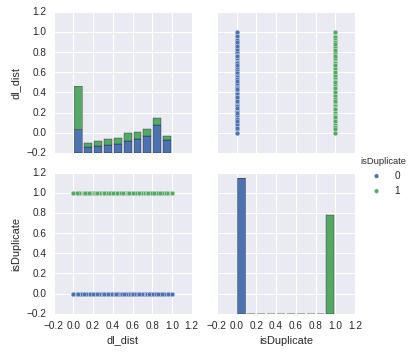

In [25]:
ax = sns.pairplot(pdtrain[['dl_dist', 'isDuplicate']], hue='isDuplicate')

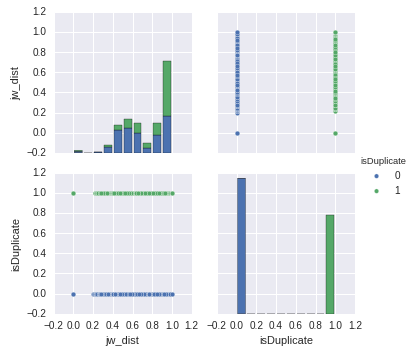

In [37]:
ax = sns.pairplot(pdtrain[['jw_dist', 'isDuplicate']], hue='isDuplicate')

In [40]:
pdtrain['jw_dist'] = 1.0 - pdtrain['jw_dist']

In [42]:
pdtrain['dl_jw_dist'] = pdtrain['dl_dist'] + pdtrain['jw_dist']

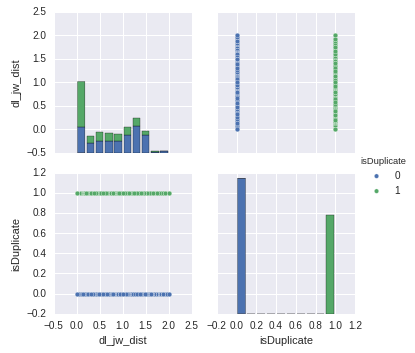

In [43]:
ax = sns.pairplot(pdtrain[['dl_jw_dist', 'isDuplicate']], hue='isDuplicate')

In [44]:
pdtrain[(pdtrain.dl_jw_dist < 0.3) & (pdtrain.isDuplicate == 0)][['title_1','title_2','description_1','description_2']]

,title_1,title_2,description_1,description_2
29,Продам шины б/у,Продам шины Б/у,Продам резину шипованную 2 шт Gislaved 185 R 1...,Продам комплект резины шипованной (4 шт) Hanko...
47,"Комната 12 м² в 1-к, 3/9 эт.","Комната 12 м² в 1-к, 3/9 эт.","Комната в хорошем состоянии, стеклопакет, посл...",Сдам комнату 5500 + свет.
48,"Комната 12 м² в 1-к, 3/9 эт.","Комната 12 м² в 1-к, 3/9 эт.",Сдам комнату 5500 + свет.,"Комната в хорошем состоянии, стеклопакет, посл..."
52,Эксклюзив,Эксклюзив,"Найдете дешевле, сделаю еще дешевле","Найдете дешевле, сделаю еще дешевле\nЦена за д..."
53,Эксклюзивы,Эксклюзив,"Найдете дешевле, сделаю еще дешевле\nЦена указ...","Найдете дешевле, сделаю еще дешевле\nЦена за д..."
54,Эксклюзив,Эксклюзивы,"Найдете дешевле, сделаю еще дешевле","Найдете дешевле, сделаю еще дешевле\nЦена указ..."
55,Эксклюзив,Эксклюзив,"Найдете дешевле, сделаю еще дешевле","Продам книгу - комикс. \nНайдете дешевле, сдел..."
56,Эксклюзивы,Эксклюзив,"Найдете дешевле, сделаю еще дешевле\nЦена указ...","Продам книгу - комикс. \nНайдете дешевле, сдел..."
79,Продам Volvo FH12 2004 года,Продам Volvo FH12 2004 года АКПП,Цена на 2 недели!!! Без торга!!!\nТягач Volvo ...,Цена на 2 недели!!! Без торга!!!\nТягач Volvo ...
88,Продам Volvo FH12 2004 года АКПП,Продам Volvo FH12 2004 года,"Тягач Volvo FH 12, 2004 г/в.(один хозяин):\n--...","Тягач Volvo FH 12, 2004 г/в.(один хозяин):\n--..."


In [45]:
d1 = pdtrain['description_1'].values
d2 = pdtrain['description_2'].values

In [46]:
description_dl = map(lambda x,y: normalized_damerau_levenshtein_distance(x,y), d1, d2)

In [47]:
descr_dl_dist = list(description_dl)
descr_df_dl_dist = np.asarray(descr_dl_dist)
pdtrain['descr_dl_dist'] = descr_df_dl_dist

Exception ignored in: 'pyxdameraulevenshtein.normalized_damerau_levenshtein_distance'
Traceback (most recent call last):
  File "pyxdameraulevenshtein.pyx", line 40, in pyxdameraulevenshtein.to_unicode (pyxdameraulevenshtein/pyxdameraulevenshtein.c:1298)
TypeError: Expected unicode, got float
Exception ignored in: 'pyxdameraulevenshtein.normalized_damerau_levenshtein_distance'
Traceback (most recent call last):
  File "pyxdameraulevenshtein.pyx", line 40, in pyxdameraulevenshtein.to_unicode (pyxdameraulevenshtein/pyxdameraulevenshtein.c:1298)
TypeError: Expected unicode, got float
Exception ignored in: 'pyxdameraulevenshtein.normalized_damerau_levenshtein_distance'
Traceback (most recent call last):
  File "pyxdameraulevenshtein.pyx", line 40, in pyxdameraulevenshtein.to_unicode (pyxdameraulevenshtein/pyxdameraulevenshtein.c:1298)
TypeError: Expected unicode, got float
Exception ignored in: 'pyxdameraulevenshtein.normalized_damerau_levenshtein_distance'
Traceback (most recent call last

In [50]:
pdtrain.to_csv(path_or_buf='train_tdl_tjw_ddl',compression ='gzip')

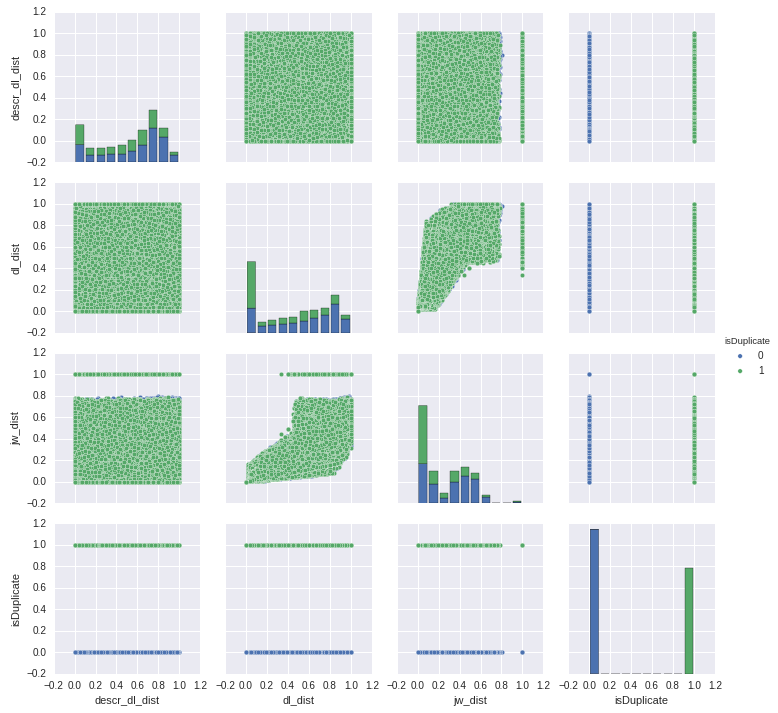

In [55]:
ax = sns.pairplot(pdtrain[['descr_dl_dist', 'dl_dist', 'jw_dist', 'isDuplicate']], hue='isDuplicate')

In [57]:
pdtrain[(pdtrain.descr_dl_dist < 0.2) & (pdtrain.jw_dist > 0.9) & (pdtrain.isDuplicate == 1)][['title_1','title_2','description_1','description_2']]

,title_1,title_2,description_1,description_2
13660,Sony Xperia z1,Z1,"Продам соньку в хорошем состоянии, со дня поку...","Продам соньку в хорошем состоянии, со дня поку..."
15387,Ремонт,От и До,"Бригада мастеров со знанием своего дела,решит ...","Бригада мастеров со знанием своего дела,решит ..."
16530,Предложение услуг,ЗИЛ,Щебень песок отсев,"Щебень, песок, отсев."
16946,Вольво вш 12,Volvo,"Вольво вш 12,2000 г.в .420 л.с я 2 владелец..е...","Вольво вш 12,2000 г.в .420 л.с я 2 владелец..е..."
17684,Продаю,Туфли,Шикарные туфли. Надевала 2 раза. Покупала за 6...,Шикарные туфли. Носила 2 раза. Покупала за 650...
19208,Штампованные диски r15,R15,продаю штампованные диски радиус R15.\nстояли ...,продам диски штампованные R15.\nстояли на волг...
23109,Леново,B560,"Состояние нормальное, нет нескольких клавиш, н...","Состояние нормальное, нет нескольких клавиш, н..."
23665,Лыжи,Комплект лыж,Продам комплект лыж. В отличном состоянии. Дли...,Продам комплект лыж. В отличном состоянии. Дли...
24581,10 рублей-гвс,Гвс,Продам!!!\nГальваника-10 руб. юбилейные монеты...,Гальваника-10 руб. юбилейные монеты.\n\n2011 г...
24776,Ищем девочку,Собака,"Ищем девочку для случки,наша порода карликовый...","Ищем девочку для случки,порода карликовый пинч..."


In [61]:
pdtrain[(pdtrain.descr_dl_dist < 0.2) & (pdtrain.dl_dist < 0.1)]['isDuplicate'].value_counts()

1    152304
0     89880
Name: isDuplicate, dtype: int64

NameError: name 'pdtrain' is not defined